In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [7]:
top = Table.read_table("top_movies_2017.csv")
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


let’s create a smaller table that has the information that we need.

three-digit numbers are easier to work with than nine-digit numbers, let’s measure the Adjusted Gross receipts in millions of dollars.

np.round is used to retain only two decimal places in each entry of the column.

In [9]:
millions = top.select(0).with_columns('Adjusted Gross', np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


Look at the values of the quantitative variable Adjusted Gross.

It is more interesting to group the values into intervals, known as bins, and see how many movies are in each bin. This process is called binning.

In [10]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(338.41, 1796.18)

Let’s try bins of width 100, starting at 300 and going to 2000.

In [11]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


There are other ways to use the bin method. If you don’t specify any bins, the default is to produce 10 equally wide bins between the minimum and maximum values of the data. This is often useful for getting a quick sense of the distribution, but the endpoints of the bins tend to be alarming.

In [12]:
millions.bin('Adjusted Gross').show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


You can specify a number of equally wide bins. For example, the option bins=4 leads to 4 equally spaced bins.

In [13]:
millions.bin('Adjusted Gross', bins=4)

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


## Histograms
The hist method generates a histogram of the values in a column.

We have not specified the bins, so hist creates 10 equally wide bins between the minimum and maximum values of the data.

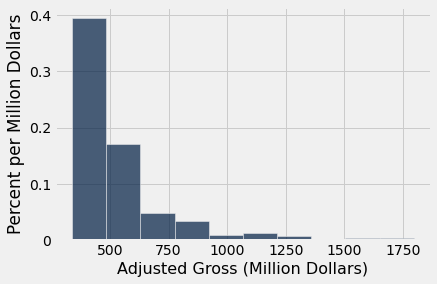

In [14]:
millions.hist('Adjusted Gross', unit="Million Dollars")

We can see that there are 10 bins (some bars are so low that they are hard to see), and that they all have the same width. 

We can also see that none of the movies grossed fewer than 300 million dollars; that is because we are considering only the top grossing movies.

The optional argument bins can be used with hist to specify the endpoints of the bins exactly as with the bin method. 

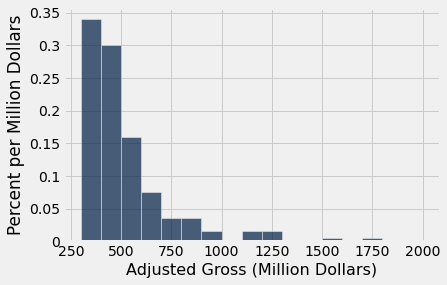

In [15]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

The horizontal axis of this figure is easier to read. For example, you can see exactly where 600 is, even though it is not labeled.

The code below is optional, just to show another example of a histogram and how we can use arrays to create bins of different sizes.

In [16]:
movies = Table().read_table("top_movies.csv")
movies

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [17]:
movies_gross = movies.select("Title").with_column("Gross", np.round(movies.column("Gross (Adjusted)") / 1_000_000, 1))
movies_gross

Title,Gross
Star Wars: The Force Awakens,906.7
Avatar,846.1
Titanic,1178.6
Jurassic World,687.7
Marvel's The Avengers,668.9
The Dark Knight,647.8
Star Wars: Episode I - The Phantom Menace,785.7
Star Wars,1549.6
Avengers: Age of Ultron,465.7
The Dark Knight Rises,501


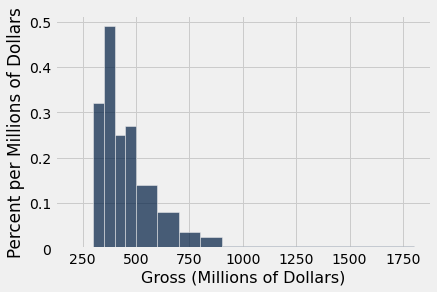

In [18]:
movies_gross.hist("Gross", bins=make_array(200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1800.0), unit="Millions of Dollars", normed=True)

# Multi-variable Scatter Chart Examples

This uses the Galton data set.

In [19]:
galton = Table().read_table("galton_subset.csv")
galton

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


You can you .scatter to show the relationships (if any) between sons heights and their parents.

Just provide the extra axis as an array.

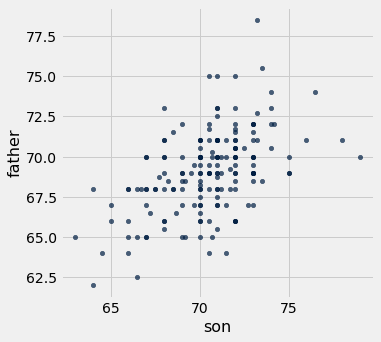

In [23]:
galton.scatter("son", ["father"])

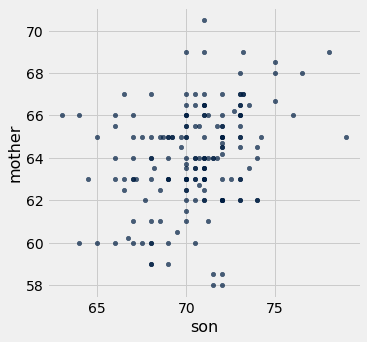

In [24]:
galton.scatter("son", ["mother"])

But if you omit the second argument completely, datascience will plot each of the other variables using different colors!

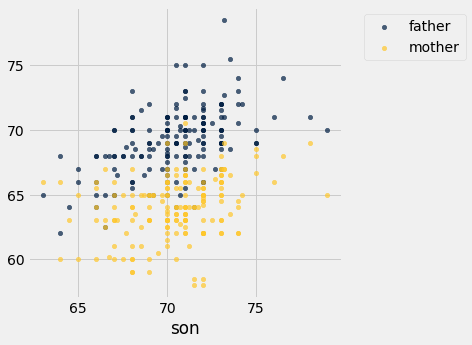

In [25]:
galton.scatter("son")

# Multi-variables line chart

This uses our population data in a line chart.

In [27]:
population = Table().read_table("pop_subset.csv")
population

AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


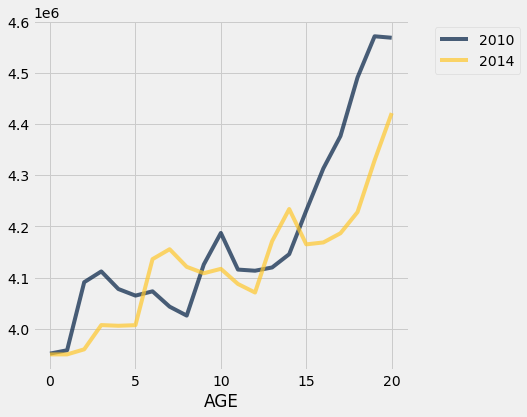

In [28]:
population.plot("AGE")

## Bar charts

The Kaiser Family Foundation has complied Census data on the distribution of race and ethnicity in the U.S.

The body of the table contains percents in the different categories in California.

In [30]:
ca_data = Table().read_table("usa_ca_2014.csv")
ca_data

Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


The method barh allows us to visualize the comparisons by drawing multiple bar charts on the same axes.

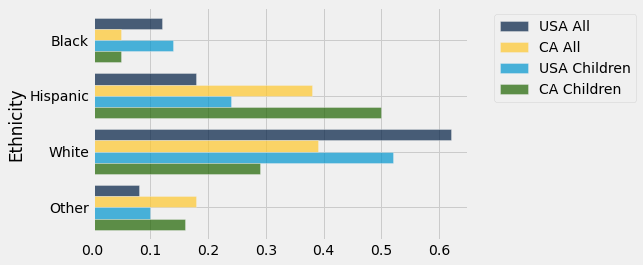

In [33]:
ca_data.barh('Ethnicity')

there is a bit too much information on this graph for us to be able to sort out similarities and differences between populations. It is much easier to compare the populations one pair at a time.

Let’s start by comparing the entire populations of the U.S.A. and California.



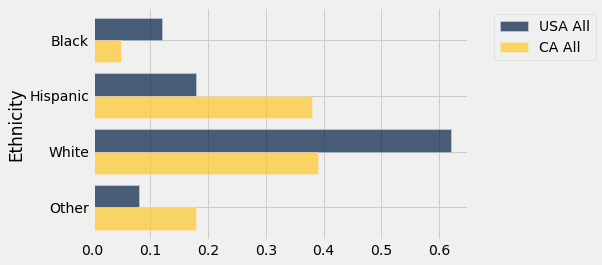

In [35]:
ca_data.select('Ethnicity', 'USA All', 'CA All').barh('Ethnicity')

The two distributions are quite different. California has higher percents Hispanic category, and correspondingly lower percents in theBlack and White categories.

As you can see from the graph, almost 40% of the Californian population in 2019 was Hispanic.

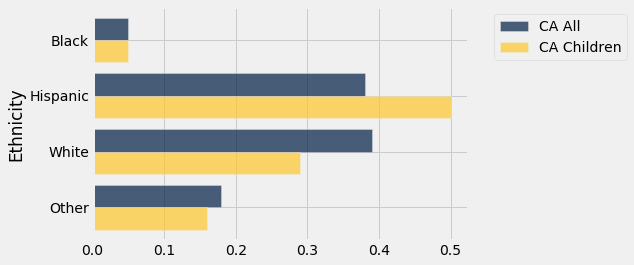

In [31]:
ca_data.barh("Ethnicity", ["CA All", "CA Children"])

In [11]:
gnuplot_vs_matplotlib = Table().read_table("multiTimeline.csv")
gnuplot_vs_matplotlib

Month,gnuplot,matplotlib
2004-01,65,4
2004-02,90,0
2004-03,64,7
2004-04,91,7
2004-05,68,3
2004-06,86,3
2004-07,86,4
2004-08,60,6
2004-09,77,6
2004-10,100,4


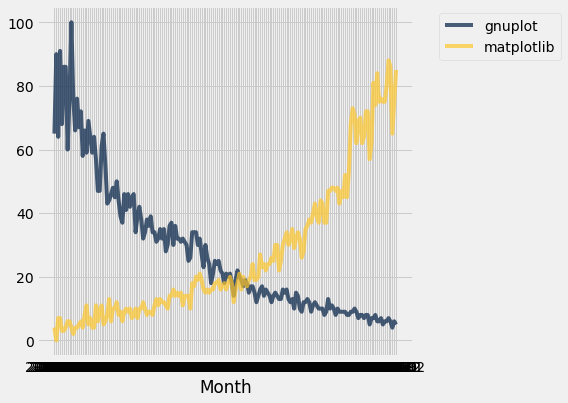

In [12]:
gnuplot_vs_matplotlib.plot("Month")